# Working with data 2018. Time series
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


In [43]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

#Visualize in line
%matplotlib inline


#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))


pd.options.mode.chained_assignment = None  # default='warn'

## 4. Parse dates
pandas is cool
- Use parse_dates=[columns] when reading the file

In [50]:
!head data/exchange-rate-twi-may-1970-aug-1.tsv

### 4.1. Use parse_dates when reading the file

In [53]:
pd.read_csv?

In [51]:
df = pd.read_csv("data/exchange-rate-twi-may-1970-aug-1.tsv",sep="\t",parse_dates=["Month"],skipfooter=2)
df.columns = ["Date","Rate"]
df.head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,Date,Rate
0,1970-05-01,100.0
1,1970-06-01,99.6
2,1970-07-01,99.4
3,1970-08-01,99.1
4,1970-09-01,99.2


In [52]:
df.dtypes

Date    datetime64[ns]
Rate           float64
dtype: object

### 4.2. You can now filter by date

In [13]:
#filter by time
df_after1980 = df.loc[df["Date"] > "1980-05-02"] #year-month-date
df_after1980.head()

,Date,Rate
121,1980-06-01,85.0
122,1980-07-01,85.5
123,1980-08-01,85.8
124,1980-09-01,85.8
125,1980-10-01,86.2


### 4.3. And still extract columns of year and month

In [14]:
#make columns with year and month (useful for models)
df_after1980["Year"] = df_after1980["Date"].dt.year
df_after1980["Month"] = df_after1980["Date"].dt.month
df_after1980.head()

,Date,Rate,Year,Month
121,1980-06-01,85.0,1980,6
122,1980-07-01,85.5,1980,7
123,1980-08-01,85.8,1980,8
124,1980-09-01,85.8,1980,9
125,1980-10-01,86.2,1980,10


### 4.4. You can resample the data with a specific frequency
- Very similar to groupby.
- Groups the data with a specific frequency
    - "A" = End of year
    - "B" = Business day
    - others: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
- Then you tell pandas to apply a function to the group (mean/max/median...)


In [55]:
#resample
df_after1980_resampled = df_after1980.resample("Q",on="Date").mean().reset_index()
df_after1980_resampled.head()

,Rate,Year,Month
Date,,,
1980-06-30,85.000000,1980.0,6.0
1980-09-30,85.700000,1980.0,8.0
1980-12-31,86.700000,1980.0,11.0
1981-03-31,88.166667,1981.0,2.0
1981-06-30,91.066667,1981.0,5.0


In [56]:
df_after1980_resampled = df_after1980_resampled.reset_index()
df_after1980_resampled.head()

,Date,Rate,Year,Month
0,1980-06-30,85.000000,1980.0,6.0
1,1980-09-30,85.700000,1980.0,8.0
2,1980-12-31,86.700000,1980.0,11.0
3,1981-03-31,88.166667,1981.0,2.0
4,1981-06-30,91.066667,1981.0,5.0


### 4.5 And of course plot it with a line plot

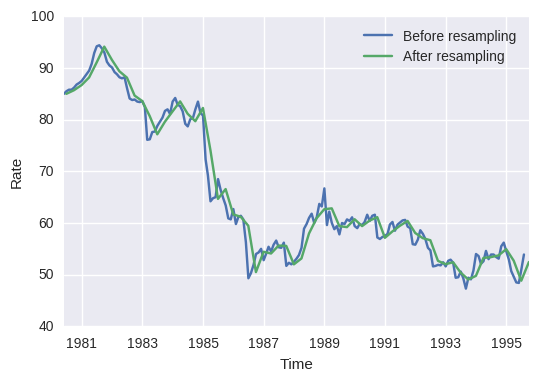

In [42]:
#Let's visualize it
plt.figure(figsize=(6,4))
plt.plot(df_after1980["Date"],df_after1980["Rate"],label="Before resampling")
plt.plot(df_after1980_resampled["Date"],df_after1980_resampled["Rate"],label="After resampling")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.legend()
plt.show()